In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import warnings

In [2]:
#reading csvs from cleaned data set
cleaned_pop_df = pd.read_csv("cleaned_population.csv")
cleaned_rental_df = pd.read_csv("cleaned_rental.csv")
cleaned_housing_df = pd.read_csv("cleaned_inventory.csv")

#top&bottom csvs
T_pop = pd.read_csv("mostchangedpop.csv")
B_pop = pd.read_csv("leastchangedpop.csv")
T_house = pd.read_csv("top10inventory.csv")
B_house = pd.read_csv("bottom10inventory.csv")
T_rental = pd.read_csv("top10rental.csv")
B_rental = pd.read_csv("bottom10rental.csv")

#data set with changing rates
population_df = pd.read_csv("sorted_population.csv")
rental_df = pd.read_csv("rental_rate.csv")
housing_df = pd.read_csv("housing_rate.csv")

#all house price csv 
house_df = pd.read_csv("All_house_price.csv")

In [3]:
#renaming the values and columns names in the dataframe
house_df = house_df.rename(columns={"RegionName":"City", "StateName": "State"})
house_df.drop(house_df.iloc[:, 5:269], inplace = True, axis = 1) 
house_df.drop(house_df.iloc[:, 0:2], inplace = True, axis = 1) 
del house_df["RegionType"]
house_df['City'] = house_df['City'].str.split(',').str[0]
house_df = house_df.replace({"Los Angeles-Long Beach-Anaheim": "Los Angeles",
                                "Dallas-Fort Worth":"Dallas",
                                 "Miami-Fort Lauderdale":"Miami",
                                 "Minneapolis-St Paul" : "Minneapolis",
                                 "Louisville-Jefferson County":"Louisville"})

In [4]:
#finding the picked cities from the dataframe
df1 = house_df.loc[house_df["City"]=='Boston']
df2 = house_df.loc[house_df["City"]=="Salt Lake City"]
df3 = house_df.loc[house_df["City"]=="Minneapolis"]
df4 = house_df.loc[house_df["City"]=="Seattle"]
df5 = house_df.loc[(house_df["City"]=="Miami") & (house_df["State"]=="FL")]
df6 = house_df.loc[house_df["City"]=="Atlanta"]
df7 = house_df.loc[(house_df["City"]=="Columbus") & (house_df["State"]=="OH")]
df8 = house_df.loc[(house_df["City"]=="Columbus") & (house_df["State"]=="GA")]
df9 = house_df.loc[(house_df["City"]=="Fayetteville") & (house_df["State"]=="NC")]
df10 = house_df.loc[house_df["City"]=="Louisville"]
df11 = house_df.loc[(house_df["City"]=="Portland") & (house_df["State"]=="OR")]
df12 = house_df.loc[house_df["City"]=="San Jose"]
df13 = house_df.loc[house_df["City"]=="New York"]
df14 = house_df.loc[house_df["City"]=="Oklahoma City"]
df15 = house_df.loc[house_df["City"]=="Denver"]
df16 = house_df.loc[house_df["City"]=="Kansas City"]

In [5]:
#combining the found data into a dateframe
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16]
result_df = pd.concat(frames).reset_index(drop=True)
result_df.head()

,City,State,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,...,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30
0,Boston,MA,467700.0,470185.0,473442.0,476265.0,478855.0,481099.0,482853.0,484075.0,...,494497.0,496306.0,498226.0,500878.0,503444.0,506016.0,507804.0,510810.0,515069.0,520206.0
1,Salt Lake City,UT,333206.0,335550.0,338798.0,342772.0,346111.0,348402.0,351203.0,353076.0,...,383407.0,385235.0,386904.0,389253.0,391949.0,395728.0,399352.0,403114.0,407119.0,411548.0
2,Minneapolis,MN,267240.0,269138.0,271047.0,272662.0,274119.0,275257.0,276360.0,277643.0,...,292758.0,293722.0,294924.0,296410.0,298060.0,299468.0,300763.0,302400.0,304678.0,307156.0
3,Seattle,WA,475604.0,482092.0,488213.0,493382.0,497390.0,499870.0,500259.0,499947.0,...,509692.0,513810.0,517960.0,522472.0,527437.0,531040.0,535111.0,540297.0,547742.0,555689.0
4,Miami,FL,275457.0,277032.0,278844.0,280405.0,282148.0,283438.0,285066.0,286088.0,...,295987.0,296648.0,298277.0,299596.0,300939.0,302132.0,303396.0,304694.0,306533.0,308911.0


In [6]:
#selecting house price data from 2018 to 2020 for each city
Boston = result_df.iloc[0, 273:]
Salt_Lake_City = result_df.iloc[1, 273:]
Minneapolis = result_df.iloc[2, 273:]
Seattle = result_df.iloc[3, 2:]
Miami = result_df.iloc[4, 2:]
Atlanta = result_df.iloc[5, 2:]
ColumbusOH = result_df.iloc[6, 2:]
ColumbusGA = result_df.iloc[7, 2:]
FayettevilleNC = result_df.iloc[8, 2:]
Louisville = result_df.iloc[9, 2:]
PortlandOR = result_df.iloc[10, 2:]
SanJose = result_df.iloc[11, 2:]
NewYork = result_df.iloc[12, 2:]
OklahomaCity = result_df.iloc[13, 2:]
Denver = result_df.iloc[14, 2:]
KansasCity = result_df.iloc[15, 2:]

<IPython.core.display.Javascript object>


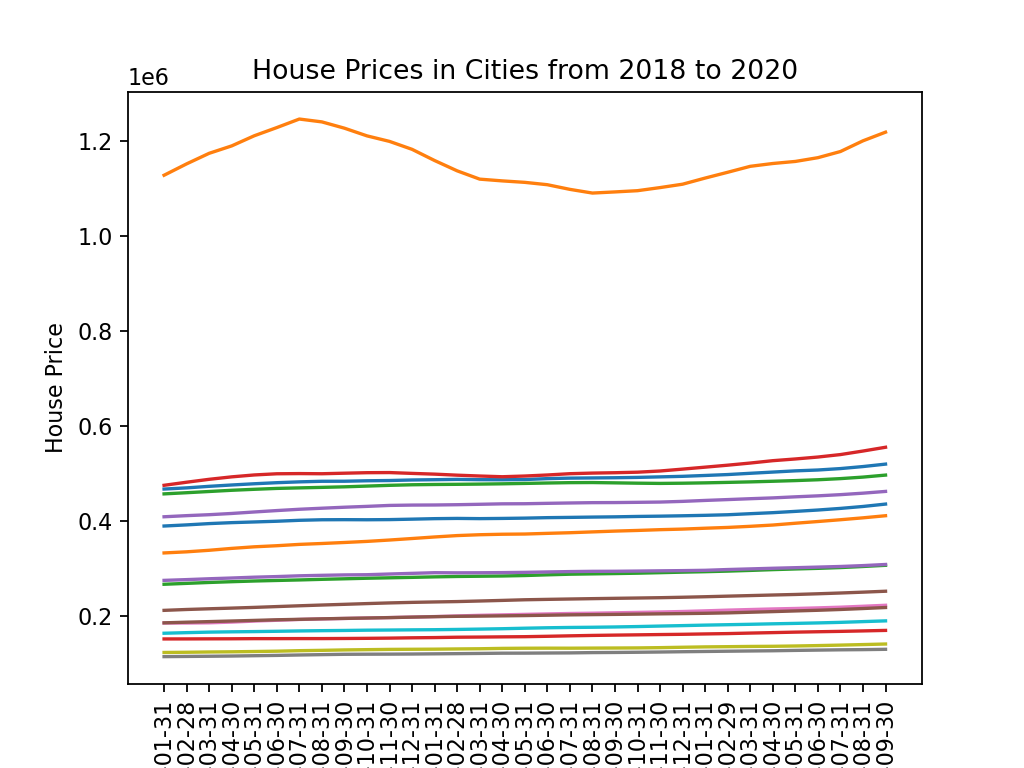

In [7]:
#plotting the house price of each city from 2018 to 2020
%matplotlib notebook
plt.plot(Boston, label="Boston")
plt.plot(Salt_Lake_City, label="Salt Lake City")
plt.plot(Minneapolis, label="Minneapolis")
plt.plot(Seattle, label="Seattle")
plt.plot(Miami, label="Miami")
plt.plot(Atlanta, label="Atlanta")
plt.plot(ColumbusOH, label="Columbus,OH")
plt.plot(ColumbusGA, label="Columbus,GA")
plt.plot(FayettevilleNC, label="Fayetteville,NC")
plt.plot(Louisville, label="Louisville")
plt.plot(PortlandOR, label="Portland,OR")
plt.plot(SanJose, label="SanJose")
plt.plot(NewYork, label="New York")
plt.plot(OklahomaCity, label="Oklahoma City")
plt.plot(Denver, label="Denver")
plt.plot(KansasCity, label="KansasCity")

plt.title("House Prices in Cities from 2018 to 2020")
plt.xlabel("Months")
plt.ylabel("House Price")
plt.xticks(rotation = 'vertical')
plt.show()

In [8]:
result_df.columns

Index(['City', 'State', '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
       '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30',
       '2018-10-31', '2018-11-30', '2018-12-31', '2019-01-31', '2019-02-28',
       '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31',
       '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
       '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
       '2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30'],
      dtype='object')

In [9]:
#calcuating yearl average of house price of each city
H2018 = ['City', 'State', '2018-01-31','2018-02-28', '2018-03-31', '2018-04-30',
       '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30',
       '2018-10-31', '2018-11-30', '2018-12-31']
H2018 = result_df[H2018]
H2018["2018 Average"]=H2018.mean(axis=1)

H2019 = ['City', 'State', '2019-01-31', '2019-02-28',
       '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31',
       '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31']
H2019 = result_df[H2019]
H2019["2019 Average"]=H2019.mean(axis=1)

H2020 = ['City', 'State','2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
       '2020-06-30', '2020-07-31', '2020-08-31']
H2020 = result_df[H2020]
H2020["2020 Average"]=H2020.mean(axis=1)

#making dataframe
Havg_df = H2018[['City', 'State']]
Havg_df["2018 Average"] = H2018["2018 Average"]
Havg_df["2019 Average"] = H2019["2019 Average"]
Havg_df["2020 Average"] = H2020["2020 Average"]
Havg_df.head()

warnings.filterwarnings('ignore')
warnings.filterwarnings(action='once')


<ipython-input-9-a309bca7f108>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  H2018["2018 Average"]=H2018.mean(axis=1)
<ipython-input-9-a309bca7f108>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  H2019["2019 Average"]=H2019.mean(axis=1)
<ipython-input-9-a309bca7f108>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [10]:
#calculating yearly changing rate for each city

Hrating_df = H2018[['City', 'State']]
Hrating_df["Changing Rate 2018-2019"] = ((Havg_df["2019 Average"]- Havg_df["2018 Average"])/Havg_df["2019 Average"])*100
Hrating_df["Changing Rate 2019-2020"] = ((Havg_df["2020 Average"]- Havg_df["2019 Average"])/Havg_df["2020 Average"])*100
Hrating_df


<ipython-input-10-da1a36ca6794>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Hrating_df["Changing Rate 2018-2019"] = ((Havg_df["2019 Average"]- Havg_df["2018 Average"])/Havg_df["2019 Average"])*100


,City,State,Changing Rate 2018-2019,Changing Rate 2019-2020
0,Boston,MA,2.121375,2.918298
1,Salt Lake City,UT,7.121803,4.880328
2,Minneapolis,MN,4.217466,3.773262
3,Seattle,WA,0.937277,5.579532
4,Miami,FL,3.392395,2.680925
5,Atlanta,GA,6.090213,4.122513
6,Columbus,OH,6.459467,5.074225
7,Columbus,GA,4.078724,3.802339
8,Fayetteville,NC,4.200577,3.498970
9,Louisville,KY,4.187712,4.804488


<IPython.core.display.Javascript object>


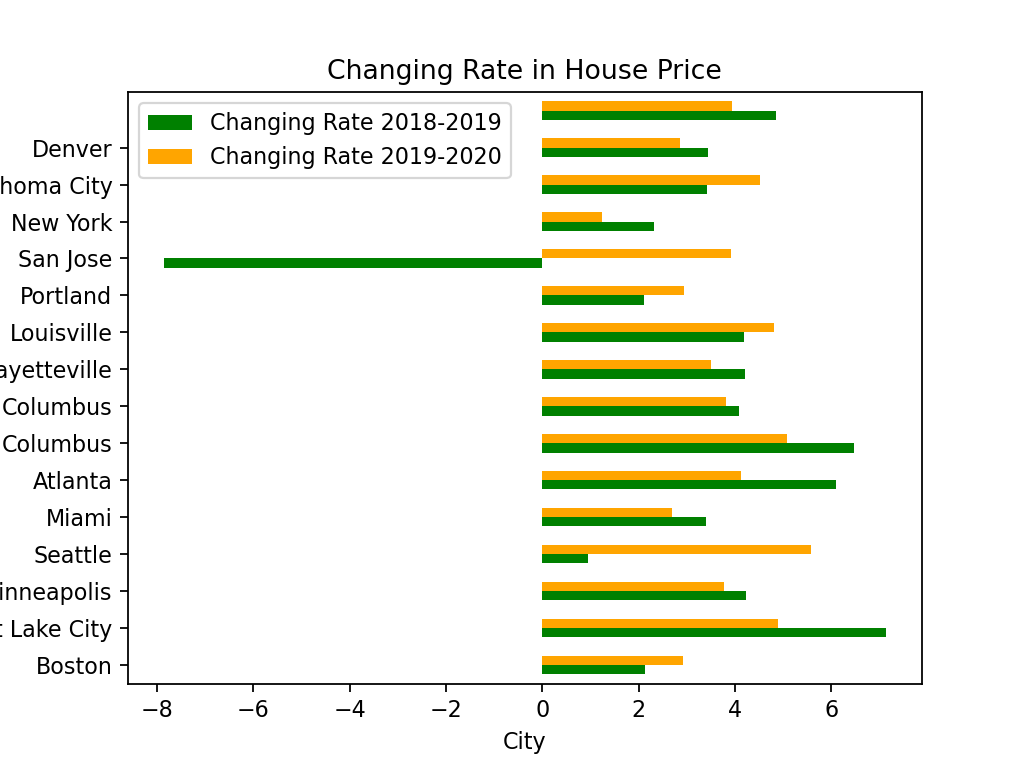

In [14]:
ax = Hrating_df.plot.barh(color=["green","orange"], rot=0)
ax.set_title("Changing Rate in House Price")
ax.set_xlabel("City")
ax.set_ylabel("Changing Rate in House Price")
x_axis = np.arange(Hrating_df["City"].nunique())
tick_locations = [value for value in x_axis]
plt.yticks(tick_locations, list(Hrating_df["City"]), rotation='horizontal')
plt.show()